In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the train dataset
train_data = pd.read_csv("FMLA1Q1Data_train.csv", header=None)

In [ ]:
# Name the columns
train_data.columns = ["x1", "x2", "y"]

In [ ]:
train_data.head()

,x1,x2,y
0,0.53767,0.67370,9.7251
1,1.83390,-0.66911,11.1090
2,-2.25880,-0.40032,22.0270
3,0.86217,-0.67180,2.4278
4,0.31877,0.57563,6.5156


In [ ]:
train_data.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.000000
mean,-0.032632,0.036899,9.966333
std,0.998967,0.998594,11.783516
min,-3.232000,-3.072200,0.409420
25%,-0.712633,-0.620370,2.521725
50%,-0.030433,0.049701,5.644650
75%,0.610568,0.673875,12.937000
max,3.578400,3.569900,106.260000


### Transform the train dataset into matrices

In [ ]:
X_train = train_data[["x1", "x2"]]
y_train = train_data["y"]

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train.shape, y_train.shape

((1000, 2), (1000,))

### Transform <br/>
### 1. $X_{train}$ into (d x n) matrix with "d" features and "n" samples
### 2. $y_{train}$ into (n x 1) column vector

In [ ]:
X_train = X_train.T
y_train = y_train.reshape(-1, 1)
X_train.shape, y_train.shape

((2, 1000), (1000, 1))

### Add bias (intercept) to $X_{train}$

In [ ]:
X_train_bias = np.ones((1, X_train.shape[1]))
X_train_biased = np.concatenate((X_train_bias, X_train), axis=0)
X_train_biased.shape

(3, 1000)

# **Least squares solution using analytical solution**

In [ ]:
def least_squares_analytical(X, y):
  """
  Analytical solution algorithm for least squares.

  Args:
    X: Feature matrix (d x n) where d is the number of features and n is the number of samples.
    y: Target vector (n x 1).

  Returns:
    w: Weight vector (d x 1).
  """
  inverse_term = np.linalg.inv(X @ X.T)
  X_y = X @ y
  w = inverse_term @ X_y
  return w

w_ml = least_squares_analytical(X_train, y_train)
w_ml_wb = least_squares_analytical(X_train_biased, y_train)
print("Least squares solution using ANALYTICAL SOLUTION:\n")
print("The w_ml (without bias) is:\n", w_ml)
print("\n")
print("The w_ml (with bias) is:\n", w_ml_wb)

Least squares solution using ANALYTICAL SOLUTION:

The w_ml (without bias) is:
 [[1.44599914]
 [3.88421178]]


The w_ml (with bias) is:
 [[9.89400832]
 [1.76570568]
 [3.5215898 ]]


### The least squares solution $w_{ML}$ using analytical solution that we have computed provides an optimal estimate for the weights by minimizing the sum of squared errors between the predicted and actual values.

### Compute the Mean Squared error

In [ ]:
def mse(X, y, w):
  """
  Calculates the mean squared error of the linear regression model.

  Args:
    X: Feature matrix (d x n) where d is the number of features and n is the number of samples.
    y: Target vector (n x 1).
    w: Weight vector (d x 1).

  Returns:
    error: The MSE of the model.
  """
  y_pred = X.T @ w
  mse = np.mean((y - y_pred)**2)
  return mse

mse_wob = mse(X_train, y_train, w_ml)
mse_wb = mse(X_train_biased, y_train, w_ml_wb)
print("The MSE of the model without bias is:\n", mse_wob)
print("\n")
print("The MSE of the model with bias is:\n", mse_wb)


The MSE of the model without bias is:
 221.02065594915877


The MSE of the model with bias is:
 123.36485997994838


### The MSE of the model with bias is lower than the MSE of the model without bias. This indicates that the model with bias is a better fit for the data.

# **Least squares solution using Gradient Descent**

In [ ]:
def gradient_descent(X, y, num_iterations):
  """
  Gradient descent algorithm for least squares.

  Args:
    X: Feature matrix (d x n) where d is the number of features and n is the number of samples.
    y: Target vector (n x 1).
    num_iterations: Number of iterations.

  Returns:
    w: Weight vector (d x 1).
  """
  t = num_iterations
  learning_rate = 1 / (t + 1)
  d, n = X.shape
  w = np.zeros((d, 1))
  w_list = []

  for i in range(t):
    gradient = 2 * (((X @ X.T) @ w) - X @ y)
    w = w - (learning_rate * gradient)
    w_list.append(w)
  return w, w_list

w_gd, w_gd_list = gradient_descent(X_train, y_train, num_iterations=10000)
w_gd_wb, w_gd_list_wb = gradient_descent(X_train_biased, y_train, num_iterations=10000)
print("Least squares solution using GRADIENT DESCENT:\n")
print("The w_gd (without bias) is:\n", w_gd)
print("\n")
print("The w_gd (with bias) is:\n", w_gd_wb)

Least squares solution using GRADIENT DESCENT:

The w_gd (without bias) is:
 [[1.44599914]
 [3.88421178]]


The w_gd (with bias) is:
 [[9.89400832]
 [1.76570568]
 [3.5215898 ]]


### The gradient descent algorithm successfully converged to a solution that is exactly equal to the least squares solution obtained using the analytical method.

## **Compute and plot (as a function of $t$)** $$ \| w_t - w_{ML} \|_2 $$



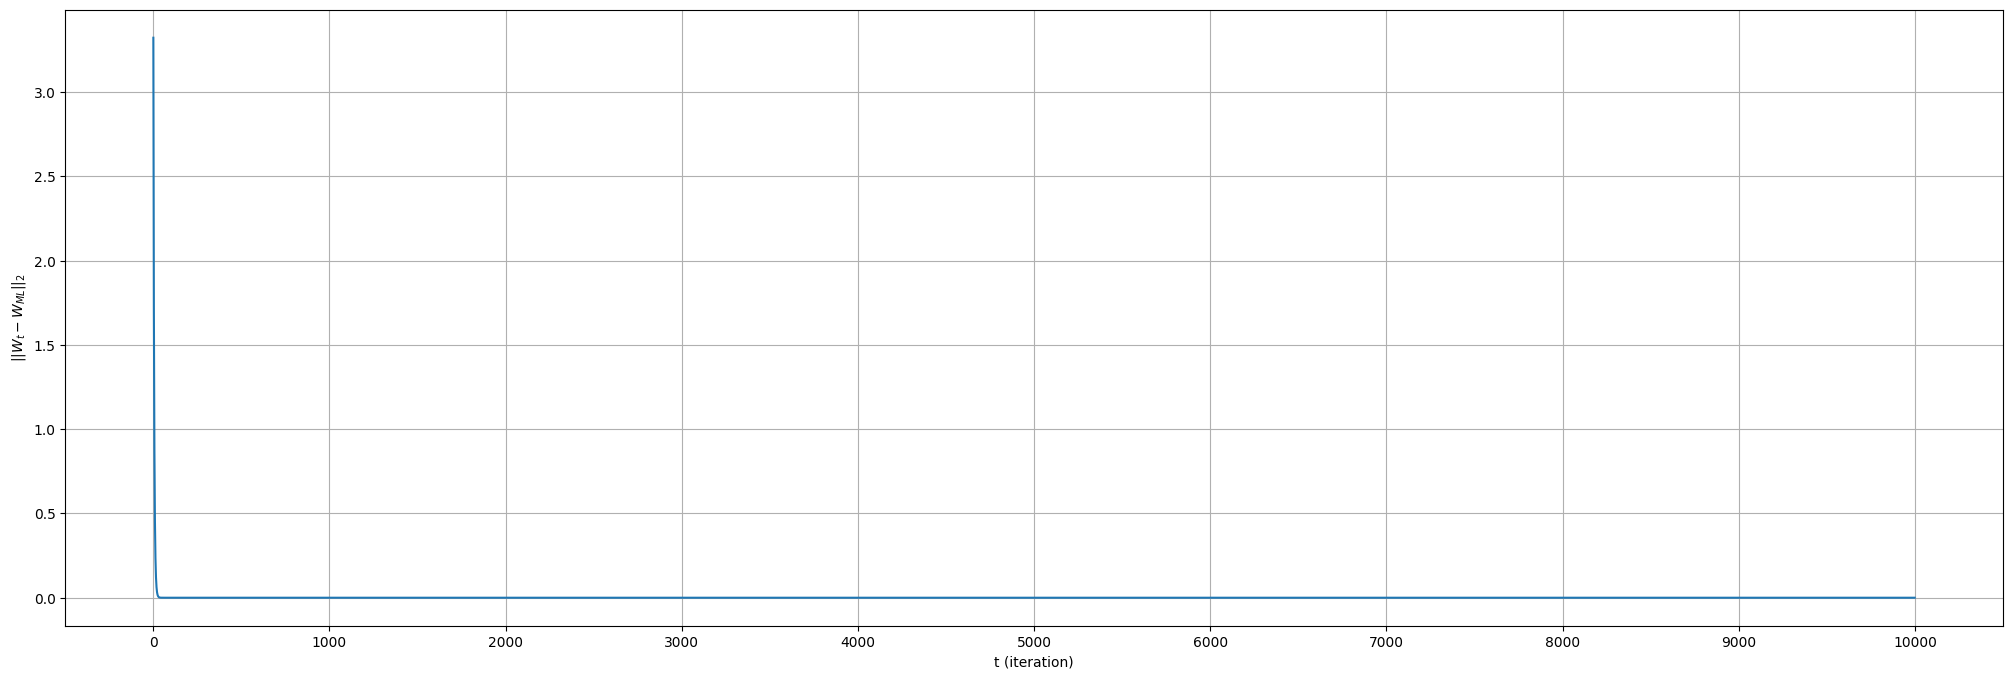

In [ ]:
# Compute
l2_norm_diff_gd = []
for w_t in w_gd_list:
  norm_diff = np.linalg.norm(w_t - w_ml)
  l2_norm_diff_gd.append(norm_diff)

# Plot
plt.figure(figsize=(25, 8))             # This is made to visualize the convergence clearly
plt.plot(range(len(l2_norm_diff_gd)), l2_norm_diff_gd)
plt.xlabel("t (iteration)")
plt.xticks(range(0, 10001, 1000))
plt.ylabel("$|| W_{t} - W_{ML} ||_2$")
plt.grid(True)
plt.show()

### The plot indicates the "Convergence of Gradient Descent algorithm to the optimal solution". The L2 norm difference between weight vector at each iteration "t" and $\ W_{\text{ML}}$ decreases as the number of iterations increases. The algorithm is steadily approaching the optimal solution. After certain number of iterations, the weight vector at iteration "t" becomes equal to $\ W_{\text{ML}}$ where the norm difference will be zero. At this "t", we can conclude that the algorithm has reached the optimal solution. As the GD uses whole dataset to update a weight, this gives us more accurate estimate of the gradient which leads to more stable convergence in terms of the loss function.

# **Least squares solution using Stochastic Gradient Descent**

In [ ]:
def stochastic_gradient_descent(X, y, k, num_iterations):
  """
  Stochastic gradient descent algorithm for least squares.

  Args:
    X: Feature matrix (d x n) where d is the number of features and n is the number of samples.
    y: Target vector (n x 1).
    k: Batch size.
    num_iterations: Number of iterations.

  Returns:
    w: Weight vector (d x 1).
  """
  t = num_iterations
  learning_rate = 1 / (t + 1)
  d, n = X.shape
  w = np.zeros((d, 1))
  w_list = []

  for i in range(t):
    indices = np.random.choice(n, size=k, replace=False)
    X_batch = X[:, indices]                # Columns to be selected in X (d x n)
    y_batch = y[indices, :]                # Rows to be selected in y (n x 1)

    gradient = 2 * (((X_batch @ X_batch.T) @ w) - X_batch @ y_batch)
    w = w - (learning_rate * gradient)
    w_list.append(w)
  w_avg = np.mean(w_list, axis=0)
  return w_avg, w_list

w_sgd, w_sgd_list = stochastic_gradient_descent(X_train, y_train, 100, num_iterations=10000)
print(f'The least squares solution w_sgd (Stochastic Gradient Descent algorithm) is: \n {w_sgd}')


The least squares solution w_sgd (Stochastic Gradient Descent algorithm) is: 
 [[1.40299138]
 [3.85591934]]


### Due to the inherent randomness in updating the weights, the $w_{SGD}$ will not be exactly equal to $w_{ML}$ or $w_{GD}$.

## **Compute and plot (as a function of $t$)** $$ \| w_t - w_{ML} \|_2 $$


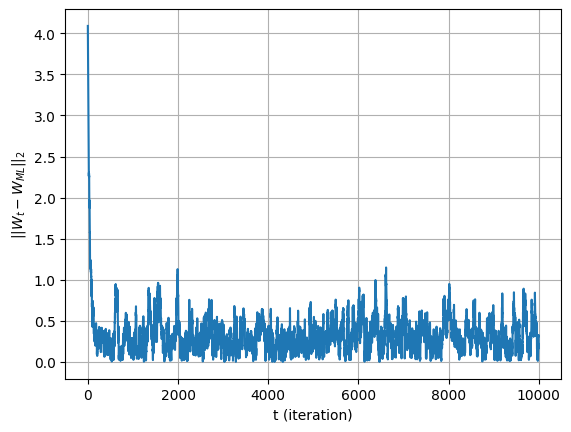

In [ ]:
# Compute
l2_norm_diff_sgd = []
for w_t in w_sgd_list:
  norm_diff = np.linalg.norm(w_t - w_ml)
  l2_norm_diff_sgd.append(norm_diff)

# Plot
plt.plot(range(len(l2_norm_diff_sgd)), l2_norm_diff_sgd)
plt.xlabel("t (iteration)")
plt.ylabel("$|| W_{t} - W_{ML} ||_2$")
plt.grid(True)
plt.show()

### The above plot indicates the "Convergence of Stochastic Gradient Descent algorithm to the optimal solution". The L2 norm difference is fluctuating. This is because SGD uses a random subset of data to update the weights at each iteration. Even though the fluctuations are there, the algorithm still converges to a solution which is close to the optimal solution with some noise.


### Stochastic Gradient Descent for Biased model

In [ ]:
w_sgd_wb, w_sgd_list_wb = stochastic_gradient_descent(X_train_biased, y_train, 100, num_iterations=10000)
print(f'The least squares solution w_sgd (Stochastic Gradient Descent algorithm for biased model) is: \n {w_sgd_wb}')

The least squares solution w_sgd (Stochastic Gradient Descent algorithm for biased model) is: 
 [[9.8321096 ]
 [1.75483309]
 [3.51880845]]


# **Gradient Descent algorithm for Ridge Regression**

In [ ]:
def gradient_descent_ridge(X, y, lambda_val, num_iterations):
  """
  Gradient descent algorithm for ridge regression.

  Args:
    X: Feature matrix (d x n) where d is the number of features and n is the number of samples.
    y: Target vector (n x 1).
    lambda_val: Regularization parameter (Hyper parameter).
    num_iterations: Number of iterations.

  Returns:
    w: Weight vector (d x 1).
  """
  t = num_iterations
  learning_rate = 1 / (t + 1)
  d, n = X.shape
  w = np.zeros((d, 1))
  w_list = []

  for i in range(t):
    gradient = 2 * (((X @ X.T) @ w) - X @ y) + 2 * lambda_val * w
    w = w - (learning_rate * gradient)
    w_list.append(w)
  return w, w_list

## Function for performing k-fold cross validation



In [ ]:
def k_fold_cross_validation(X, y, k, lambda_values):
  """
  Performs k-fold cross-validation for lambda in ridge regression.

  Args:
    X: Feature matrix.
    y: Target vector.
    k: Number of folds.
    lambda_values: List of lambda values to test.

  Returns:
    val_errors: List of average validation errors for each lambda value.
  """
  d, n = X.shape
  fold_size = n // k
  indices = np.arange(n)
  val_errors = []

  for lambda_val in lambda_values:
    errors = []
    for i in range(k):
      # Split data into training and validation sets
      val_indices = indices[i * fold_size : (i + 1) * fold_size]
      train_indices = np.setdiff1d(indices, val_indices)
      X_train_cv = X[:, train_indices]
      y_train_cv = y[train_indices, :]
      X_val_cv = X[:, val_indices]
      y_val_cv = y[val_indices, :]

      # Train the model with the current lambda value
      w_ridge, w_list_ridge = gradient_descent_ridge(X_train_cv, y_train_cv, lambda_val, num_iterations=10000)

      # Predict on the validation set
      y_pred_val = X_val_cv.T @ w_ridge

      # Compute the mean squared error on the validation set
      error = np.mean((y_val_cv - y_pred_val) ** 2)
      errors.append(error)

    # Compute average validation error for current lambda value
    avg_error = np.mean(errors)
    val_errors.append(avg_error)

  return val_errors

## Take a range of $\lambda$ values, perform k-fold cross validation to find out the validation error and the corresponding (the best) $\lambda$.

## Unbiased Model

In [ ]:
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]
k = 5           # Number of folds
val_errors = k_fold_cross_validation(X_train, y_train, k, lambda_values)

min_val_error = np.min(val_errors)
min_lambda_index = np.argmin(val_errors)
min_lambda = lambda_values[min_lambda_index]

print(f"Minimum validation error: {min_val_error}")
print(f"Corresponding(The Best) lambda value: {min_lambda}")

Minimum validation error: 223.11590786289736
Corresponding(The Best) lambda value: 10


### Plot the error in the validation set as a function of $\lambda$

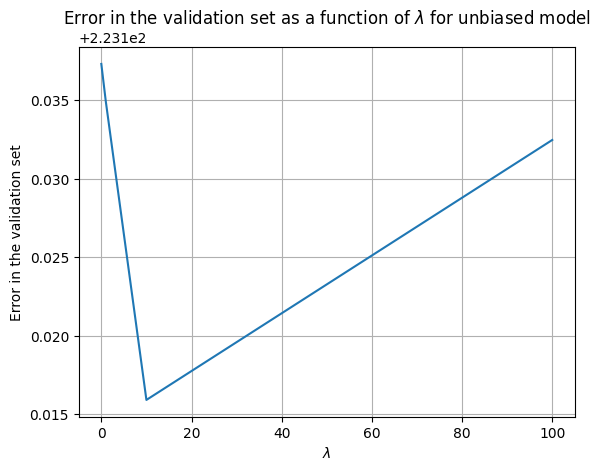

In [ ]:
plt.plot(lambda_values, val_errors)
plt.xlabel("$\lambda$")
plt.ylabel("Error in the validation set")
plt.title("Error in the validation set as a function of $\lambda$ for unbiased model")
plt.grid(True)
plt.show()

### The plot shows the error in the validation set as a function of the regularization parameter $\lambda$ for the unbiased model. As $\lambda$ increases, the error initially decreases due to the regularization effect, but then starts to increase if $\lambda$ becomes too large. The optimal $\lambda$ value corresponds to the point where the error is minimized.


### Compute $w_R$ by using the best $\lambda$ w.r.t the minimum validation error

In [ ]:
w_ridge, w_ridge_list = gradient_descent_ridge(X_train, y_train, lambda_val=min_lambda, num_iterations=10000)
print(f'The w_r (Ridge Regression) for unbiased model is: \n {w_ridge}')

The w_r (Ridge Regression) for unbiased model is: 
 [[1.43125259]
 [3.84550793]]


## Biased Model

In [ ]:
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]
k = 5           # Number of folds
val_errors_wb = k_fold_cross_validation(X_train_biased, y_train, k, lambda_values)

min_val_error_wb = np.min(val_errors_wb)
min_lambda_index_wb = np.argmin(val_errors_wb)
min_lambda_wb = lambda_values[min_lambda_index_wb]

print(f"Minimum validation error (Biased model): {min_val_error_wb}")
print(f"Corresponding(The Best) lambda value (Biased model): {min_lambda_wb}")

Minimum validation error (Biased model): 124.99495209533521
Corresponding(The Best) lambda value (Biased model): 1


### Plot the error in the validation set as a function of $\lambda$ (Biased model)

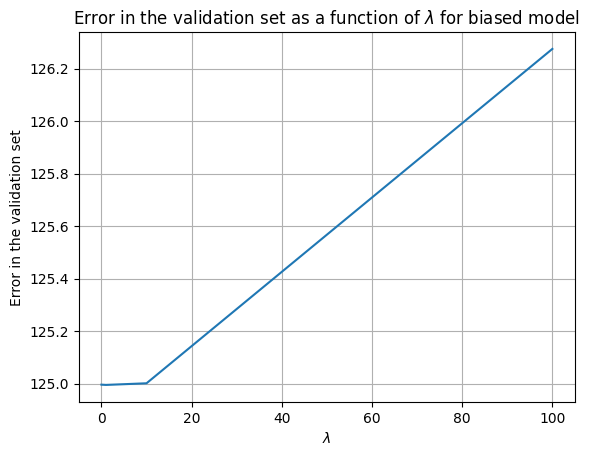

In [ ]:
plt.plot(lambda_values, val_errors_wb)
plt.xlabel("$\lambda$")
plt.ylabel("Error in the validation set")
plt.title("Error in the validation set as a function of $\lambda$ for biased model")
plt.grid(True)
plt.show()

### Compute $w_R$ by using the best $\lambda$ w.r.t the minimum validation error (Biased model)

In [ ]:
w_ridge_wb, w_ridge_list_wb = gradient_descent_ridge(X_train_biased, y_train, lambda_val=min_lambda_wb, num_iterations=10000)
print(f'The w_r (Ridge Regression) for biased model is: \n {w_ridge_wb}')

The w_r (Ridge Regression) for biased model is: 
 [[9.88417244]
 [1.7635836 ]
 [3.51840435]]


In [ ]:
# Load the test dataset
test_data = pd.read_csv("FMLA1Q1Data_test.csv", header=None)

In [ ]:
# Name the columns
test_data.columns = ["x1", "x2", "y"]

In [ ]:
test_data.head()

,x1,x2,y
0,0.87060,-0.73016,2.4105
1,0.33076,-0.91633,1.6318
2,-1.34790,1.78760,12.3770
3,1.54790,-0.82040,6.8406
4,-0.61664,-0.19671,1.6138


### Transform the test dataset into matrices

In [ ]:
X_test = test_data[["x1", "x2"]]
y_test = test_data["y"]

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test.T
y_test = y_test.reshape(-1, 1)

X_test.shape, y_test.shape

((2, 100), (100, 1))

### Add bias (intercept) to $X_{test}$

In [ ]:
X_test_biased = np.ones((1, X_test.shape[1]))
X_test_biased = np.concatenate((X_test_biased, X_test), axis=0)
X_test_biased.shape

(3, 100)

## Compare the test error of $w_{R}$ with $w_{ML}$.

### Unbiased Model

In [ ]:
y_pred_test_ml = X_test.T @ w_ml
test_error_ml = np.mean((y_test - y_pred_test_ml) ** 2)

y_pred_test_ridge = X_test.T @ w_ridge
test_error_ridge = np.mean((y_test - y_pred_test_ridge) ** 2)

print("Test errors for unbiased model:")
print(f"Test error of w_ml: {test_error_ml}")
print(f"Test error of w_r: {test_error_ridge}")

Test errors for unbiased model:
Test error of w_ml: 142.76610663299087
Test error of w_r: 142.8053166564239


### Biased Model

In [ ]:
y_pred_test_ml_wb = X_test_biased.T @ w_ml_wb
test_error_ml_wb = np.mean((y_test - y_pred_test_ml_wb) ** 2)

y_pred_test_ridge_wb = X_test_biased.T @ w_ridge_wb
test_error_ridge_wb = np.mean((y_test - y_pred_test_ridge_wb) ** 2)

print("Test errors for biased model:")
print(f"Test error of w_ml: {test_error_ml_wb}")
print(f"Test error of w_r: {test_error_ridge_wb}")

Test errors for biased model:
Test error of w_ml: 66.00545933461238
Test error of w_r: 65.99000384575946


### Based on the analysis and results from the code, we can conclude that for this specific dataset,  $w_{R}$ (Ridge Regression solution) tends to be a better choice than $w_{ML}$ (Least Squares solution) in terms of generalization performance.


## Visualization of original data and prediction using $W_{ML}$ (Unbiased model)

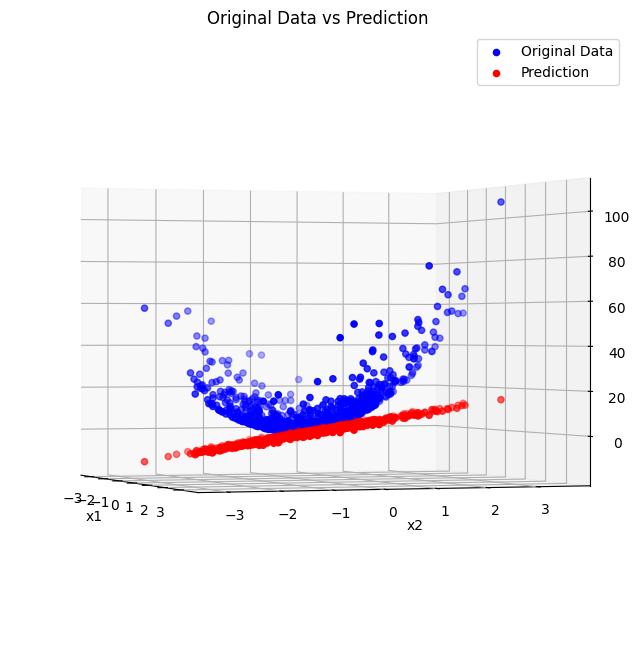

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Prediction
y_pred = X_train.T @ w_ml

# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data
ax.scatter(X_train[0, :], X_train[1, :], y_train, color='blue', label='Original Data')

# Plot the predicted data
ax.scatter(X_train[0, :], X_train[1, :], y_pred, color='red', label='Prediction')

# Set labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(elev=0, azim=-20)
ax.set_title('Original Data vs Prediction')

plt.legend()
plt.show()


### From the above plot, we can say that the dataset contains non-linear pattern which is parabolic. So we can use **Polynomial Kernel with degree 2** for kernel regression.

# **Kernel Regression**

### I chose **Polynomial Kernel** because <br/>

$K(x_{i}, x_{j}) = (x_{i} . x_{j} + c)^{p}$ where "p" is the degree of polynomial & "c" is a coefficient


1.   Since the dataset likely contains non-linear patterns specifically quadratic, the polynomial kernel is capable of capturing non-linear relationships in the data.
2.   It will capture the quadratic relationship explicitly without overfitting to more complex patterns.


In [ ]:
def polynomial_kernel(x1, x2, deg=2, coef=1):
  return ((np.dot(x1, x2) + coef) ** deg)

In [ ]:
def kernel_regression(X_tr, y, X_te, deg=2, coef=1):
  y_pred = np.zeros(X_te.shape[0])

  for i, x_test in enumerate(X_te):
    weights = np.array([polynomial_kernel(x_train, x_test, deg, coef) for x_train in X_tr])
    y_pred[i] = np.sum(weights * y) / np.sum(weights)

  return y_pred

In [ ]:
y_pred_kr = kernel_regression(X_train.T, y_train, X_test.T, 2, 1)
print(np.mean((y_pred_kr - y_test) ** 2))